# Projeto SuperComputação 2024.1

## Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


In [321]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 11             # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
with open('grafo.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [312]:
!pip install vrpy

Defaulting to user installation because normal site-packages is not writeable


In [317]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafo.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=15)  # Pode alterar a capacidade
prob.num_stops = 5                                 # Pode alterar o número máximo de paradas
prob.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 5
INFO:vrpy.vrp:Clarke & Wright solution found with value 424 and 5 vehicles
INFO:vrpy.vrp:Greedy solution found with value 443 and 5 vehicles
INFO:vrpy.vrp:iteration 0, 424.0
INFO:vrpy.vrp:iteration 1, 411.0
INFO:vrpy.vrp:iteration 2, 411.0
INFO:vrpy.vrp:iteration 3, 411.0
INFO:vrpy.master_solve_pulp:total cost = 411.0


No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.
No negative cost cycle has been found and elementary set to true.
Consider setting elementary to false.


In [318]:
prob.best_routes

{1: ['Source', 6, 8, 'Sink'],
 2: ['Source', 2, 'Sink'],
 3: ['Source', 4, 7, 'Sink'],
 4: ['Source', 3, 'Sink'],
 5: ['Source', 1, 'Sink'],
 6: ['Source', 5, 'Sink']}

In [319]:
prob.best_value

411

In [309]:
prob.best_routes_cost

{1: 12, 2: 16, 3: 60, 4: 176}

In [310]:
prob.best_routes_load

{1: 7, 2: 5, 3: 5, 4: 10}

 ### 1. Algoritmo de busca global

Dado o pseudo-código abaixo, implemente-o em C++ e compare (com um gráfico) seu tempo de execução em função de diferentes tamanhos de entrada. Note que ele NÃO ESTÁ COMPLETO!

```cpp
Função ResolverVRPComDemanda(Locais, Demanda, C):
    // Locais: Lista de locais para entrega (excluindo o depósito)
    // Demanda: Dicionário mapeando cada local à sua demanda
    // C: Capacidade do veículo
    
    MelhorRota = NULL
    MenorCusto = INFINITO

    // Gera todas as combinações possíveis de rotas considerando a capacidade do veículo
    Combinações = GerarTodasAsCombinações(Locais)
    
    Para cada combinação em Combinações faça:
        Se VerificarCapacidade(combinação, Demanda, C) então:
            CustoAtual = CalcularCusto(combinação)
            Se CustoAtual < MenorCusto então:
                MenorCusto = CustoAtual
                MelhorRota = combinação
                
    Retornar MelhorRota, MenorCusto

Função GerarTodasAsCombinações(Locais):
    // Gera todas as permutações possíveis de locais e agrupa em rotas válidas conforme a capacidade
    // Esta função é bastante complexa, pois precisa considerar todas as subdivisões possíveis dos locais em rotas que atendam à capacidade do veículo
    // Retorna uma lista de combinações válidas
    Retornar combinações

Função VerificarCapacidade(Rota, Demanda, C):
    // Verifica se a demanda total da rota não excede a capacidade do veículo
    CargaTotal = 0
    Para cada local em Rota faça:
        CargaTotal += Demanda[local]
    Se CargaTotal > C então:
        Retornar Falso
    Senão:
        Retornar Verdadeiro

Função CalcularCusto(Rota):
    // Calcula o custo de uma rota com base na distância, tempo ou outro critério
    // O custo pode depender de fatores como a distância total percorrida, o número de veículos necessários, entre outros
    Retornar custo

// Início do programa
// Define os locais, suas demandas e a capacidade do veículo
Locais = [...]
Demanda = {...}
Capacidade = C

MelhorRota, MenorCusto = ResolverVRPComDemanda(Locais, Demanda, Capacidade)
Exibir "A melhor rota é:", MelhorRota, "com custo total de:", MenorCusto
```

### Resposta Q1

Caio de camargo aranha Tieri Q1


```cpp

#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <utility>
#include <chrono>

using namespace std;

struct Aresta {
    int origem;
    int destino;
    int custo;
};

void lerArquivoGrafo(const string& nomeArquivo, int& numVertices, unordered_map<int, int>& demandasVertices, vector<Aresta>& listaConexoes) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        cerr << "Erro ao abrir o arquivo!" << endl;
        exit(1);
    }

    arquivo >> numVertices;
    demandasVertices[0] = 0;

    for (int i = 1; i < numVertices; ++i) {
        int vertice, demanda;
        arquivo >> vertice >> demanda;
        demandasVertices[vertice] = demanda;
    }

    int numConexoes;
    arquivo >> numConexoes;

    for (int i = 0; i < numConexoes; ++i) {
        Aresta aresta;
        arquivo >> aresta.origem >> aresta.destino >> aresta.custo;
        listaConexoes.push_back(aresta);
    }

    arquivo.close();
}

vector<vector<int>> gerarPermutacoes(vector<int>& vertices) {
    vector<vector<int>> permutacoes;
    sort(vertices.begin(), vertices.end());
    do {
        permutacoes.push_back(vertices);
    } while (next_permutation(vertices.begin(), vertices.end()));
    return permutacoes;
}

vector<vector<int>> verificarCapacidade(vector<vector<int>>& rotas, const unordered_map<int, int>& demandasVertices, int capacidade) {
    vector<vector<int>> rotasValidas;

    for (auto& rota : rotas) {
        int cargaAtual = 0;
        bool rotaValida = true;

        for (int vertice : rota) {
            if (vertice == 0) {
                cargaAtual = 0;
            } else {
                cargaAtual += demandasVertices.at(vertice);
                if (cargaAtual > capacidade) {
                    rotaValida = false;
                    break;
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(rota);
        }
    }

    return rotasValidas;
}

int calcularCusto(const vector<int>& rota, const unordered_map<int, unordered_map<int, int>>& mapaCustoConexoes) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = mapaCustoConexoes.find(origem);
        if (it != mapaCustoConexoes.end()) {
            auto it2 = it->second.find(destino);
            if (it2 != it->second.end()) {
                custoTotal += it2->second;
            }
        }
    }
    return custoTotal;
}


vector<vector<int>> validarRotas(vector<vector<int>>& permutacoes, const vector<Aresta>& listaConexoes) {
    vector<vector<int>> rotasValidas;

    for (auto& permutacao : permutacoes) {
        if (permutacao[0] != 0) {
            permutacao.insert(permutacao.begin(), 0);
        }
        if (permutacao.back() != 0) {
            permutacao.push_back(0);
        }

        bool rotaValida = true;
        for (size_t i = 0; i < permutacao.size() - 1; ++i) {
            int origem = permutacao[i];
            int destino = permutacao[i + 1];
            bool arestaExiste = false;
            for (const auto& aresta : listaConexoes) {
                if (aresta.origem == origem && aresta.destino == destino) {
                    arestaExiste = true;
                    break;
                }
            }
            if (!arestaExiste) {
                bool rotaValida1 = false;
                bool rotaValida2 = false;
                for (const auto& aresta : listaConexoes) {
                    if (aresta.origem == origem && aresta.destino == 0) {
                        rotaValida1 = true;
                    }
                    if (aresta.origem == 0 && aresta.destino == destino) {
                        rotaValida2 = true;
                    }
                }
                if (!rotaValida1 || !rotaValida2) {
                    rotaValida = false;
                    break;
                } else {
                    permutacao.insert(permutacao.begin() + i + 1, 0);
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(permutacao);
        }
    }

    return rotasValidas;
}


unordered_map<int, unordered_map<int, int>> construirMapaCustos(const vector<Aresta>& listaConexoes) {
    unordered_map<int, unordered_map<int, int>> mapaCustoConexoes;
    for (const auto& aresta : listaConexoes) {
        mapaCustoConexoes[aresta.origem][aresta.destino] = aresta.custo;
    }
    return mapaCustoConexoes;
}

pair<vector<int>, int> resolverVRP(vector<int>& vertices, const unordered_map<int, int>& demandasVertices, const vector<Aresta>& listaConexoes, int capacidade) {
    vector<int> melhorRota;
    int menorCusto = numeric_limits<int>::max();

    auto mapaCustoConexoes = construirMapaCustos(listaConexoes);

    vector<vector<int>> permutacoes = gerarPermutacoes(vertices);

    permutacoes = validarRotas(permutacoes, listaConexoes);

    permutacoes = verificarCapacidade(permutacoes, demandasVertices, capacidade);

    for (const auto& permutacao : permutacoes) {
        int custo = calcularCusto(permutacao, mapaCustoConexoes);
        if (custo < menorCusto) {
            menorCusto = custo;
            melhorRota = permutacao;
        }
    }

    return {melhorRota, menorCusto};
}

int main() {

    auto inicio = std::chrono::high_resolution_clock::now();
    string nomeArquivo = "./grafo.txt";
    int numVertices;
    unordered_map<int, int> demandasVertices;
    vector<Aresta> listaConexoes;

    lerArquivoGrafo(nomeArquivo, numVertices, demandasVertices, listaConexoes);

    vector<int> vertices;
    for (int i = 1; i < numVertices; ++i) {
        vertices.push_back(i);
    }

    int capacidade = 15;

    auto [melhorRota, menorCusto] = resolverVRP(vertices, demandasVertices, listaConexoes, capacidade);

    cout << "Melhores rotas:" << endl;
    int numeroRota = 1;
    vector<int> rotaAtual;
    for (int i = 0; i < melhorRota.size(); ++i) {
        if (melhorRota[i] == 0 && !rotaAtual.empty()) {
            cout << numeroRota << ": [0, ";
            for (size_t j = 0; j < rotaAtual.size(); ++j) {
                cout << rotaAtual[j];
                if (j < rotaAtual.size() - 1) cout << ", ";
            }
            cout << ", 0]" << endl;
            rotaAtual.clear();
            numeroRota++;
        } else if (melhorRota[i] != 0) {
            rotaAtual.push_back(melhorRota[i]);
        }
    }

    cout << "Menor custo: " << menorCusto << endl;

    auto fim = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duracao = fim - inicio;
    std::cout << "Tempo de execução: " << duracao.count() << " segundos" << std::endl;
    std::cout << "Número de nós: " << numVertices << "\n";

    return 0;
}


    ```


Dados obtidos:



Melhores rotas:

1: [0, 1, 0]

2: [0, 2, 3, 0]

3: [0, 4, 0]

Menor custo: 327

Tempo de execução: 0.000457539 segundos

Número de nós: 5

___________________________________________________________________________________________

Melhores rotas:

1: [0, 1, 0]

2: [0, 2, 5, 0]

3: [0, 3, 0]

4: [0, 4, 6, 0]

Menor custo: 528

Tempo de execução: 0.00435195 segundos

Número de nós: 7

___________________________________________________________________________________________

Melhores rotas:

1: [0, 1, 3, 4, 6, 0]

2: [0, 2, 0]

3: [0, 5, 0]

4: [0, 7, 0]

5: [0, 8, 0]

Menor custo: 694

Tempo de execução: 0.319498 segundos

Número de nós: 9

___________________________________________________________________________________________

Melhores rotas:

1: [0, 1, 6, 0]

2: [0, 2, 7, 0]

3: [0, 3, 0]

4: [0, 4, 0]

5: [0, 5, 0]

6: [0, 8, 0]

7: [0, 9, 0]

Menor custo: 663

Tempo de execução: 3.07664 segundos

Número de nós: 10

___________________________________________________________________________________________

Melhores rotas:

1: [0, 1, 2, 5, 9, 0]

2: [0, 3, 0]

3: [0, 4, 10, 0]

4: [0, 6, 0]

5: [0, 7, 0]

6: [0, 8, 0]

Menor custo: 861

Tempo de execução: 39.9375 segundos

Número de nós: 11

In [301]:
!pip install matplotlib


import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


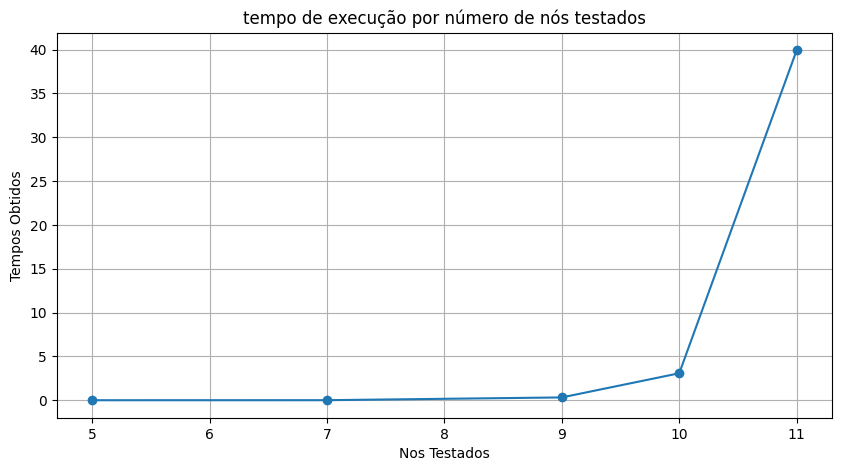

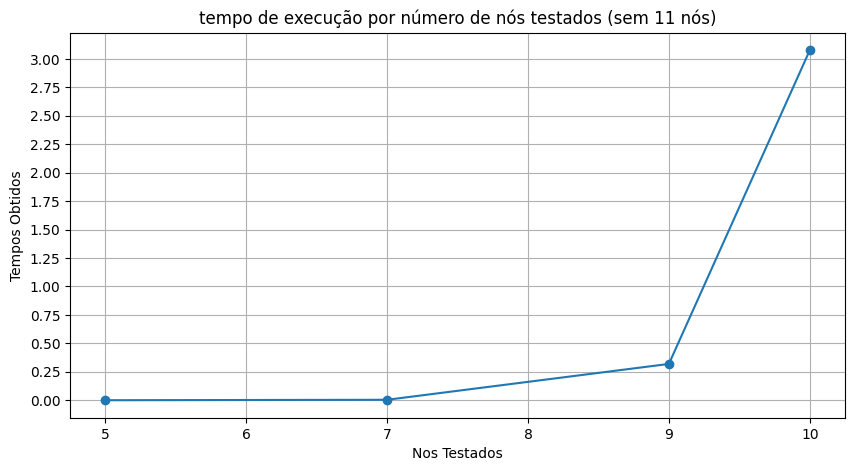

In [302]:
nos_testados = [5,7,9,10,11]

tempos_obtidos = [0.000457539,0.00435195,0.319498, 3.07664, 39.9375]

import matplotlib.pyplot as plt

# All data
plt.figure(figsize=(10, 5))
plt.plot(nos_testados, tempos_obtidos, marker='o')
plt.title('tempo de execução por número de nós testados')
plt.xlabel('Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.grid(True)
plt.show()

# Excluding last item
plt.figure(figsize=(10, 5))
plt.plot(nos_testados[:-1], tempos_obtidos[:-1], marker='o')
plt.title('tempo de execução por número de nós testados (sem 11 nós)')
plt.xlabel('Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.yticks(np.arange(min(tempos_obtidos[:-1]), max(tempos_obtidos[:-1]), step=0.25))
plt.grid(True)
plt.show()





### 2. Solução aproximada

Para problemas complexos as heurísticas são ferramentas essenciais, pois oferecem soluções aproximadas em tempo razoável, especialmente quando o problema é grande demais para abordagens de força bruta ou métodos exatos. Heurísticas não garantem a melhor solução possível, mas frequentemente encontram soluções muito boas com um esforço computacional significativamente menor.

Algumas das heurísticas e métodos meta-heurísticos mais comuns para o VRP incluem:

  - _Heurística de Inserção Mais Próxima_: Começa com uma rota contendo apenas o depósito e, em seguida, iterativamente insere o cliente mais próximo em sua posição de menor custo até que todos os clientes sejam incluídos. Esta abordagem é simples e relativamente rápida, mas pode não encontrar a melhor solução possível.
  - _Heurística de Clarke e Wright (Economias)_: Uma das heurísticas mais conhecidas para o VRP, que começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias", ou seja, reduções no custo total da rota. Essa abordagem tenta equilibrar o custo de visitar cada cliente com o custo de conectar rotas.
  - _Algoritmos Genéticos_: Uma classe de métodos de busca e otimização baseados nos princípios de seleção natural e genética. Eles usam operações como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo do tempo, em busca da melhor solução possível.

Implemente uma das heurísticas citadas, ou elabore outra solução aproximada, que dê uma solução em tempo razoável para o problema. Aqui, além de implementar o algoritmo, é importante que você descreva brevemente sua estratégia de solução no relatório.

Mesmo cortes mais simples do espaço de busca estão valendo, por exemplo, considerando que há um limite máximo de visitas em cada rota, podemos de cara cortar as combinações de cidades que ultrapassam esse limite. Podemos, ainda, estabelecer um limite mínimo, para evitar rotas pequenas.





### Resposta Q2

**Estratégia (Heurística de Inserção Mais Próxima)** : O grafo é lido de um arquivo (func:lerArquivoGrafo), inicializando uma matriz de custos e um vetor de demandas. A rota inicia no depósito (nó 0) e é marcada como visitada na função principal (main). A rota é construída iterativamente (func:heuristicaInsercaoMaisProxima), inserindo o nó não visitado mais próximo ao final da rota, respeitando a capacidade do veículo. Se a demanda do próximo nó excede a capacidade restante, retornamos ao depósito antes de continuar. A função func:encontrarMaisProximo auxilia na identificação do cliente mais próximo ainda não visitado.

O custo total é calculado somando os custos das arestas percorridas e a rota obrigatoriamente finaliza no depósito (func:heuristicaInsercaoMaisProxima) A função principal (main) coordena a leitura do grafo, a execução da heurística e a impressão dos resultados, além de medir o tempo de execução com a biblioteca chrono. A heurística oferece soluções boas em tempo reduzido, adequada para problemas grandes onde métodos exatos são impraticáveis. Embora não garanta a melhor solução, é uma abordagem prática e eficiente, equilibrando qualidade da solução e tempo de execução.


``` cpp
#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <utility>
#include <chrono>

using namespace std;

struct Conexao {
    int origem;
    int destino;
    int custo;
};

struct DetalhesGrafo {
    int numVertices;
    vector<vector<int>> custos;
    unordered_map<int, int> demandas;
};

struct Solucao {
    vector<int> melhorRota;
    int menorCusto;
};

const int CAPACIDADE_VEICULO = 15;

DetalhesGrafo lerArquivoGrafo(const string& nomeArquivo) {
    DetalhesGrafo grafo;
    ifstream arquivo(nomeArquivo);

    if (!arquivo.is_open()) {
        cerr << "Erro ao abrir o arquivo!" << endl;
        exit(1);
    }

    arquivo >> grafo.numVertices;
    grafo.custos.resize(grafo.numVertices, vector<int>(grafo.numVertices, numeric_limits<int>::max()));
    grafo.demandas[0] = 0;

    for (int i = 1; i < grafo.numVertices; ++i) {
        int vertice, demanda;
        arquivo >> vertice >> demanda;
        grafo.demandas[vertice] = demanda;
    }

    int numConexoes;
    arquivo >> numConexoes;

    for (int i = 0; i < numConexoes; ++i) {
        int origem, destino, custo;
        arquivo >> origem >> destino >> custo;
        grafo.custos[origem][destino] = custo;
        grafo.custos[destino][origem] = custo; // Considera-se que o grafo é não direcionado
    }

    arquivo.close();
    return grafo;
}

int encontrarMaisProximo(const DetalhesGrafo& grafo, const vector<bool>& visitado, int ultimo, int cargaRestante) {
    int distanciaMinima = numeric_limits<int>::max();
    int maisProximo = -1;

    for (int i = 1; i < grafo.numVertices; ++i) {
        if (!visitado[i] && grafo.custos[ultimo][i] < distanciaMinima && grafo.demandas.at(i) <= cargaRestante) {
            distanciaMinima = grafo.custos[ultimo][i];
            maisProximo = i;
        }
    }

    return maisProximo;
}

Solucao heuristicaInsercaoMaisProxima(const DetalhesGrafo& grafo) {
    int n = grafo.numVertices;
    vector<bool> visitado(n, false);
    vector<int> rota;
    int custoTotal = 0;
    int cargaAtual = 0;

    rota.push_back(0);
    visitado[0] = true;
    int ultimo = 0;

    for (int i = 1; i < n; ++i) {
        int maisProximo = encontrarMaisProximo(grafo, visitado, ultimo, CAPACIDADE_VEICULO - cargaAtual);
        if (maisProximo != -1) {
            rota.push_back(maisProximo);
            visitado[maisProximo] = true;
            cargaAtual += grafo.demandas.at(maisProximo);
            custoTotal += grafo.custos[ultimo][maisProximo];
            ultimo = maisProximo;
        } else {
            custoTotal += grafo.custos[ultimo][0];
            rota.push_back(0);
            cargaAtual = 0;
            ultimo = 0;
            i--;  // Reavaliar a inserção de nós restantes
        }
    }

    if (ultimo != 0) {
        custoTotal += grafo.custos[ultimo][0];
        rota.push_back(0);
    }

    Solucao solucao;
    solucao.melhorRota = rota;
    solucao.menorCusto = custoTotal;

    return solucao;
}

int main() {
    auto inicio = std::chrono::high_resolution_clock::now();
    string nomeArquivo = "./grafo.txt";
    int numVertices;
    unordered_map<int, int> demandasVertices;
    vector<Conexao> listaConexoes;

    DetalhesGrafo grafo = lerArquivoGrafo(nomeArquivo);
    numVertices = grafo.numVertices;
    demandasVertices = grafo.demandas;

    // Convertendo a matriz de custos para a lista de conexões
    for (int i = 0; i < numVertices; ++i) {
        for (int j = 0; j < numVertices; ++j) {
            if (grafo.custos[i][j] != numeric_limits<int>::max() && i != j) {
                Conexao conexao;
                conexao.origem = i;
                conexao.destino = j;
                conexao.custo = grafo.custos[i][j];
                listaConexoes.push_back(conexao);
            }
        }
    }

    vector<int> vertices;
    for (int i = 1; i < numVertices; ++i) {
        vertices.push_back(i);
    }

    int capacidade = 15;

    Solucao melhorSolucao = heuristicaInsercaoMaisProxima(grafo);

    cout << "Melhores rotas:" << endl;
    int numeroRota = 1;
    vector<int> rotaAtual;
    for (int i = 0; i < melhorSolucao.melhorRota.size(); ++i) {
        if (melhorSolucao.melhorRota[i] == 0 && !rotaAtual.empty()) {
            cout << numeroRota << ": [0, ";
            for (size_t j = 0; j < rotaAtual.size(); ++j) {
                cout << rotaAtual[j];
                if (j < rotaAtual.size() - 1) cout << ", ";
            }
            cout << ", 0]" << endl;
            rotaAtual.clear();
            numeroRota++;
        } else if (melhorSolucao.melhorRota[i] != 0) {
            rotaAtual.push_back(melhorSolucao.melhorRota[i]);
        }
    }

    cout << "Menor custo: " << melhorSolucao.menorCusto << endl;

    auto fim = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duracao = fim - inicio;
    std::cout << "Tempo de execução: " << duracao.count() << " segundos" << std::endl;
    std::cout << "Número de nós: " << numVertices << "\n";

    return 0;
}
```

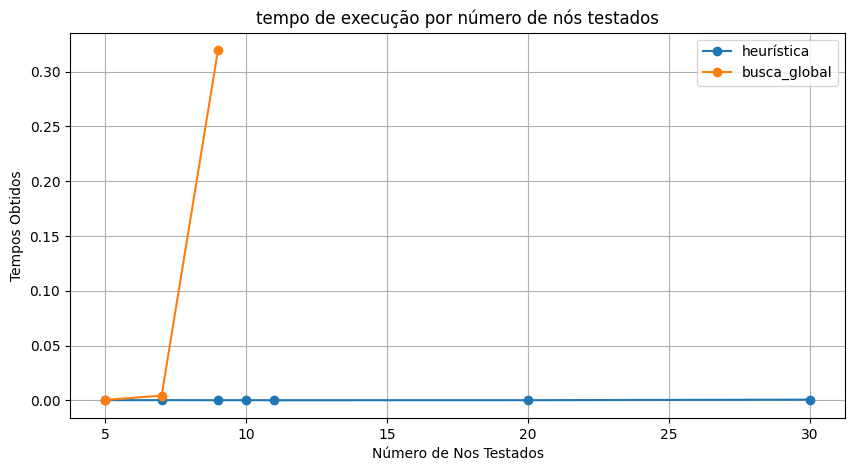

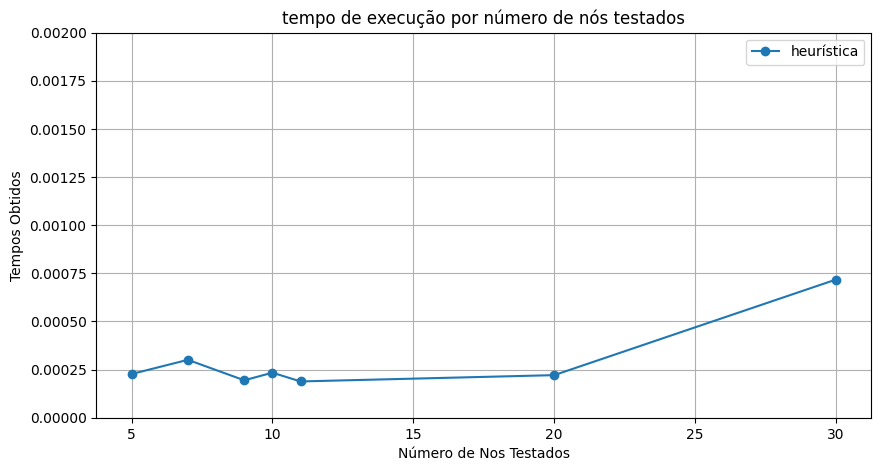

In [303]:
nos_testados2 = [5, 7, 9, 10, 11, 20, 30]
tempos_obtidos2 = [0.000226885, 0.000300772, 0.000194427, 0.000233871,  0.000188452, 0.000221213, 0.000717908 ]

# All data
plt.figure(figsize=(10, 5))
plt.plot(nos_testados2, tempos_obtidos2, marker='o')
plt.plot(nos_testados[:-2], tempos_obtidos[:-2], marker='o')
plt.title('tempo de execução por número de nós testados')
plt.xlabel('Número de Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.grid(True)
plt.legend([ "heurística", "busca_global"])
plt.show()

#only heuristic
plt.figure(figsize=(10, 5))
plt.plot(nos_testados2, tempos_obtidos2, marker='o')
plt.title('tempo de execução por número de nós testados')
plt.xlabel('Número de Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.legend(["heurística"])
plt.ylim(0, 0.002)
plt.grid(True)
plt.show()

### 3. Soluções paralelizadas

Na abordagem de força bruta para a resolução do problema de otimização de rotas de veículos, a parte mais custosa computacionalmente é a geração e avaliação de todas as permutações possíveis das cidades (ou pontos de entrega).

Esta é também a parte que oferece maior potencial para paralelização. Mas existem outras?

Nesta etapa do projeto você deve realizar 2 implementações paralelas da sua solução, sendo:

- 1 solução baseada em "paralelização local", ou seja, usar threads para extrair o máximo de proveito da máquina que rodará o programa;
- 1 solução baseada em "paralelização global", ou seja, construir uma solução que paraleliza a execução em múltiplas máquinas de um cluster, acelerando ainda mais a execução. Note que seu programa de paralelização global deve também fazer uso de paralelização local. Em outras palavras, você particionará o problema e alocará cada parte em uma máquina; em cada máquina você usará os recursos presentes (cores) para paralelizar ainda mais!


#### Solucao Paralelizada com Threads OpenMP

``` cpp
#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <utility>
#include <chrono>
#include <omp.h>

using namespace std;

struct Aresta {
    int origem;
    int destino;
    int custo;
};

void lerArquivoGrafo(const string& nomeArquivo, int& numVertices, unordered_map<int, int>& demandasVertices, vector<Aresta>& listaConexoes) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        cerr << "Erro ao abrir o arquivo!" << endl;
        exit(1);
    }

    arquivo >> numVertices;
    demandasVertices[0] = 0;

    for (int i = 1; i < numVertices; ++i) {
        int vertice, demanda;
        arquivo >> vertice >> demanda;
        demandasVertices[vertice] = demanda;
    }

    int numConexoes;
    arquivo >> numConexoes;

    for (int i = 0; i < numConexoes; ++i) {
        Aresta aresta;
        arquivo >> aresta.origem >> aresta.destino >> aresta.custo;
        listaConexoes.push_back(aresta);
    }

    arquivo.close();
}

vector<vector<int>> gerarPermutacoes(vector<int>& vertices) {
    vector<vector<int>> permutacoes;
    sort(vertices.begin(), vertices.end());
    do {
        permutacoes.push_back(vertices);
    } while (next_permutation(vertices.begin(), vertices.end()));
    return permutacoes;
}

vector<vector<int>> verificarCapacidade(vector<vector<int>>& rotas, const unordered_map<int, int>& demandasVertices, int capacidade) {
    vector<vector<int>> rotasValidas;

    for (auto& rota : rotas) {
        int cargaAtual = 0;
        bool rotaValida = true;

        for (int vertice : rota) {
            if (vertice == 0) {
                cargaAtual = 0;
            } else {
                cargaAtual += demandasVertices.at(vertice);
                if (cargaAtual > capacidade) {
                    rotaValida = false;
                    break;
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(rota);
        }
    }

    return rotasValidas;
}

int calcularCusto(const vector<int>& rota, const unordered_map<int, unordered_map<int, int>>& mapaCustoConexoes) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = mapaCustoConexoes.find(origem);
        if (it != mapaCustoConexoes.end()) {
            auto it2 = it->second.find(destino);
            if (it2 != it->second.end()) {
                custoTotal += it2->second;
            }
        }
    }
    return custoTotal;
}

vector<vector<int>> validarRotas(vector<vector<int>>& permutacoes, const vector<Aresta>& listaConexoes) {
    vector<vector<int>> rotasValidas;

    for (auto& permutacao : permutacoes) {
        if (permutacao[0] != 0) {
            permutacao.insert(permutacao.begin(), 0);
        }
        if (permutacao.back() != 0) {
            permutacao.push_back(0);
        }

        bool rotaValida = true;
        for (size_t i = 0; i < permutacao.size() - 1; ++i) {
            int origem = permutacao[i];
            int destino = permutacao[i + 1];
            bool arestaExiste = false;
            for (const auto& aresta : listaConexoes) {
                if (aresta.origem == origem && aresta.destino == destino) {
                    arestaExiste = true;
                    break;
                }
            }
            if (!arestaExiste) {
                bool rotaValida1 = false;
                bool rotaValida2 = false;
                for (const auto& aresta : listaConexoes) {
                    if (aresta.origem == origem && aresta.destino == 0) {
                        rotaValida1 = true;
                    }
                    if (aresta.origem == 0 && aresta.destino == destino) {
                        rotaValida2 = true;
                    }
                }
                if (!rotaValida1 || !rotaValida2) {
                    rotaValida = false;
                    break;
                } else {
                    permutacao.insert(permutacao.begin() + i + 1, 0);
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(permutacao);
        }
    }

    return rotasValidas;
}

unordered_map<int, unordered_map<int, int>> construirMapaCustos(const vector<Aresta>& listaConexoes) {
    unordered_map<int, unordered_map<int, int>> mapaCustoConexoes;
    for (const auto& aresta : listaConexoes) {
        mapaCustoConexoes[aresta.origem][aresta.destino] = aresta.custo;
    }
    return mapaCustoConexoes;
}

pair<vector<int>, int> resolverVRP(vector<int>& vertices, const unordered_map<int, int>& demandasVertices, const vector<Aresta>& listaConexoes, int capacidade) {
    vector<int> melhorRota;
    int menorCusto = numeric_limits<int>::max();

    auto mapaCustoConexoes = construirMapaCustos(listaConexoes);

    vector<vector<int>> permutacoes = gerarPermutacoes(vertices);

    permutacoes = validarRotas(permutacoes, listaConexoes);

    permutacoes = verificarCapacidade(permutacoes, demandasVertices, capacidade);

    #pragma omp parallel for
    for (int i = 0; i < permutacoes.size(); ++i) {
        int custo = calcularCusto(permutacoes[i], mapaCustoConexoes);
        #pragma omp critical
        if (custo < menorCusto) {
            menorCusto = custo;
            melhorRota = permutacoes[i];
        }
    }

    return {melhorRota, menorCusto};
}

int main() {
    auto inicio = std::chrono::high_resolution_clock::now();
    string nomeArquivo = "./grafo.txt";
    int numVertices;
    unordered_map<int, int> demandasVertices;
    vector<Aresta> listaConexoes;

    lerArquivoGrafo(nomeArquivo, numVertices, demandasVertices, listaConexoes);

    vector<int> vertices;
    for (int i = 1; i < numVertices; ++i) {
        vertices.push_back(i);
    }

    int capacidade = 15;

    auto [melhorRota, menorCusto] = resolverVRP(vertices, demandasVertices, listaConexoes, capacidade);

    cout << "Melhores rotas:" << endl;
    int numeroRota = 1;
    vector<int> rotaAtual;
    for (int i = 0; i < melhorRota.size(); ++i) {
        if (melhorRota[i] == 0 && !rotaAtual.empty()) {
            cout << numeroRota << ": [0, ";
            for (size_t j = 0; j < rotaAtual.size(); ++j) {
                cout << rotaAtual[j];
                if (j < rotaAtual.size() - 1) cout << ", ";
            }
            cout << ", 0]" << endl;
            rotaAtual.clear();
            numeroRota++;
        } else if (melhorRota[i] != 0) {
            rotaAtual.push_back(melhorRota[i]);
        }
    }

    cout << "Menor custo: " << menorCusto << endl;

    auto fim = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duracao = fim - inicio;
    std::cout << "Tempo de execução: " << duracao.count() << " segundos" << std::endl;
    std::cout << "Número de nós: " << numVertices << "\n";

    return 0;
}

```

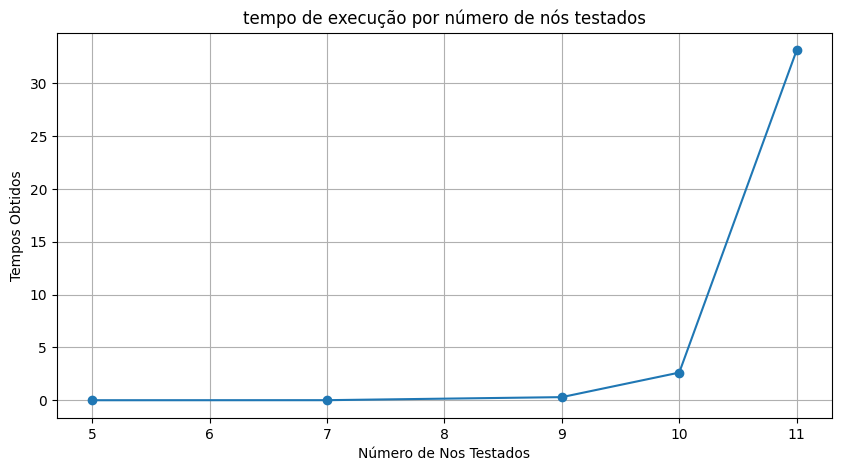

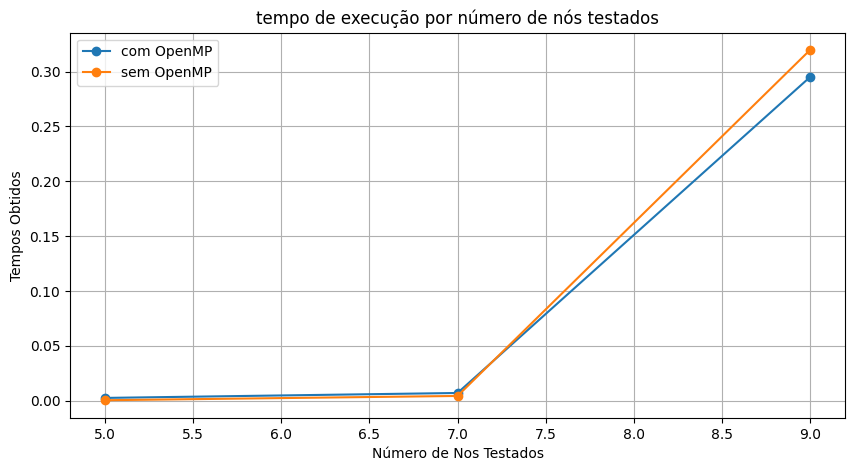

In [304]:
nos_testados3 = [5, 7, 9, 10, 11]
tempos_obtidos3 = [0.00256101, 0.00705917, 0.294842, 2.61972, 33.1415]

# All data
plt.figure(figsize=(10, 5))
plt.plot(nos_testados3, tempos_obtidos3, marker='o')
plt.title('tempo de execução por número de nós testados')
plt.xlabel('Número de Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.grid(True)
plt.show()

#with and without openmp 
plt.figure(figsize=(10, 5))
plt.plot(nos_testados3[:-2], tempos_obtidos3[:-2], marker='o')
plt.plot(nos_testados[:-2], tempos_obtidos[:-2], marker='o')
plt.title('tempo de execução por número de nós testados')
plt.xlabel('Número de Nos Testados')
plt.ylabel('Tempos Obtidos')
plt.legend(["com OpenMP", "sem OpenMP"])

plt.grid(True)
plt.show()

Justificativa na baixa variacao entre resultados: 

A diferença não significativa nos tempos de execução entre as versões com e sem OpenMP pode ser atribuída ao tempo extra necessário para gerenciar várias threads e à sincronização entre elas. Para problemas menores, esse tempo extra pode anular os benefícios da paralelização. Além disso, a eficiência do cache de memória e a competição por recursos compartilhados podem impactar negativamente o desempenho, fazendo com que a paralelização não traga vantagens significativas em termos de tempo de execução para o tamanho dos problemas testados.

#### Solucao Paralelizada com MPI



```cpp
#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <utility>
#include <chrono>
#include <omp.h>
#include <mpi.h>

using namespace std;

struct Aresta {
    int origem;
    int destino;
    int custo;
};

void lerArquivoGrafo(const string& nomeArquivo, int& numVertices, unordered_map<int, int>& demandasVertices, vector<Aresta>& listaConexoes) {
    ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        cerr << "Erro ao abrir o arquivo!" << endl;
        exit(1);
    }

    arquivo >> numVertices;
    demandasVertices[0] = 0;

    for (int i = 1; i < numVertices; ++i) {
        int vertice, demanda;
        arquivo >> vertice >> demanda;
        demandasVertices[vertice] = demanda;
    }

    int numConexoes;
    arquivo >> numConexoes;

    for (int i = 0; i < numConexoes; ++i) {
        Aresta aresta;
        arquivo >> aresta.origem >> aresta.destino >> aresta.custo;
        listaConexoes.push_back(aresta);
    }

    arquivo.close();
}

vector<vector<int>> gerarPermutacoes(vector<int>& vertices) {
    vector<vector<int>> permutacoes;
    sort(vertices.begin(), vertices.end());
    do {
        permutacoes.push_back(vertices);
    } while (next_permutation(vertices.begin(), vertices.end()));
    return permutacoes;
}

vector<vector<int>> verificarCapacidade(vector<vector<int>>& rotas, const unordered_map<int, int>& demandasVertices, int capacidade) {
    vector<vector<int>> rotasValidas;

    for (auto& rota : rotas) {
        int cargaAtual = 0;
        bool rotaValida = true;

        for (int vertice : rota) {
            if (vertice == 0) {
                cargaAtual = 0;
            } else {
                cargaAtual += demandasVertices.at(vertice);
                if (cargaAtual > capacidade) {
                    rotaValida = false;
                    break;
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(rota);
        }
    }

    return rotasValidas;
}

int calcularCusto(const vector<int>& rota, const unordered_map<int, unordered_map<int, int>>& mapaCustoConexoes) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = mapaCustoConexoes.find(origem);
        if (it != mapaCustoConexoes.end()) {
            auto it2 = it->second.find(destino);
            if (it2 != it->second.end()) {
                custoTotal += it2->second;
            }
        }
    }
    return custoTotal;
}

vector<vector<int>> validarRotas(vector<vector<int>>& permutacoes, const vector<Aresta>& listaConexoes) {
    vector<vector<int>> rotasValidas;

    for (auto& permutacao : permutacoes) {
        if (permutacao[0] != 0) {
            permutacao.insert(permutacao.begin(), 0);
        }
        if (permutacao.back() != 0) {
            permutacao.push_back(0);
        }

        bool rotaValida = true;
        for (size_t i = 0; i < permutacao.size() - 1; ++i) {
            int origem = permutacao[i];
            int destino = permutacao[i + 1];
            bool arestaExiste = false;
            for (const auto& aresta : listaConexoes) {
                if (aresta.origem == origem && aresta.destino == destino) {
                    arestaExiste = true;
                    break;
                }
            }
            if (!arestaExiste) {
                bool rotaValida1 = false;
                bool rotaValida2 = false;
                for (const auto& aresta : listaConexoes) {
                    if (aresta.origem == origem && aresta.destino == 0) {
                        rotaValida1 = true;
                    }
                    if (aresta.origem == 0 && aresta.destino == destino) {
                        rotaValida2 = true;
                    }
                }
                if (!rotaValida1 || !rotaValida2) {
                    rotaValida = false;
                    break;
                } else {
                    permutacao.insert(permutacao.begin() + i + 1, 0);
                }
            }
        }
        if (rotaValida) {
            rotasValidas.push_back(permutacao);
        }
    }

    return rotasValidas;
}

unordered_map<int, unordered_map<int, int>> construirMapaCustos(const vector<Aresta>& listaConexoes) {
    unordered_map<int, unordered_map<int, int>> mapaCustoConexoes;
    for (const auto& aresta : listaConexoes) {
        mapaCustoConexoes[aresta.origem][aresta.destino] = aresta.custo;
    }
    return mapaCustoConexoes;
}

pair<vector<int>, int> resolverVRP(vector<int>& vertices, const unordered_map<int, int>& demandasVertices, const vector<Aresta>& listaConexoes, int capacidade) {
    vector<int> melhorRota;
    int menorCusto = numeric_limits<int>::max();

    auto mapaCustoConexoes = construirMapaCustos(listaConexoes);

    vector<vector<int>> permutacoes = gerarPermutacoes(vertices);

    permutacoes = validarRotas(permutacoes, listaConexoes);

    permutacoes = verificarCapacidade(permutacoes, demandasVertices, capacidade);

    #pragma omp parallel for
    for (int i = 0; i < permutacoes.size(); ++i) {
        int custo = calcularCusto(permutacoes[i], mapaCustoConexoes);
        #pragma omp critical
        if (custo < menorCusto) {
            menorCusto = custo;
            melhorRota = permutacoes[i];
        }
    }

    return {melhorRota, menorCusto};
}

int main(int argc, char* argv[]) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    auto inicio = std::chrono::high_resolution_clock::now();

    int numVertices;
    unordered_map<int, int> demandasVertices;
    vector<Aresta> listaConexoes;

    if (rank == 0) {
        lerArquivoGrafo("grafo.txt", numVertices, demandasVertices, listaConexoes);
    }

    MPI_Bcast(&numVertices, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank != 0) {
        demandasVertices[0] = 0;
        for (int i = 1; i < numVertices; ++i) {
            demandasVertices[i] = 0;
        }
    }

    MPI_Bcast(&demandasVertices[0], numVertices, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Bcast(&listaConexoes[0], listaConexoes.size() * sizeof(Aresta), MPI_BYTE, 0, MPI_COMM_WORLD);

    vector<int> vertices;
    for (int i = 1; i < numVertices; ++i) {
        vertices.push_back(i);
    }

    int capacidade = 15;

    auto [melhorRota, menorCusto] = resolverVRP(vertices, demandasVertices, listaConexoes, capacidade);

    int globalMenorCusto;
    MPI_Reduce(&menorCusto, &globalMenorCusto, 1, MPI_INT, MPI_MIN, 0, MPI_COMM_WORLD);

    if (rank == 0) {
        cout << "Melhores rotas:" << endl;
        int numeroRota = 1;
        vector<int> rotaAtual;
        for (int i = 0; i < melhorRota.size(); ++i) {
            if (melhorRota[i] == 0 && !rotaAtual.empty()) {
                cout << numeroRota << ": [0, ";
                for (size_t j = 0; j < rotaAtual.size(); ++j) {
                    cout << rotaAtual[j];
                    if (j < rotaAtual.size() - 1) cout << ", ";
                }
                cout << ", 0]" << endl;
                rotaAtual.clear();
                numeroRota++;
            } else if (melhorRota[i] != 0) {
                rotaAtual.push_back(melhorRota[i]);
            }
        }

        cout << "Menor custo: " << globalMenorCusto << endl;

        auto fim = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double> duracao = fim - inicio;
        std::cout << "Tempo de execução: " << duracao.count() << " segundos" << std::endl;
        std::cout << "Número de nós: " << numVertices << "\n";
    }

    MPI_Finalize();
    return 0;
}

```

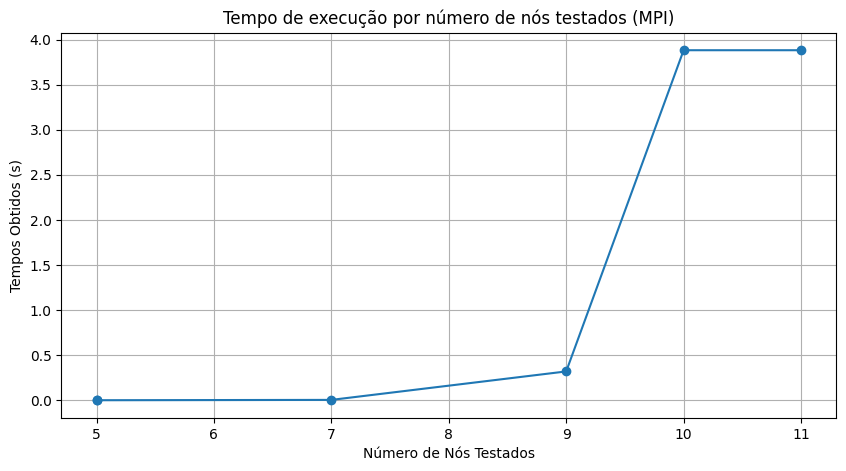

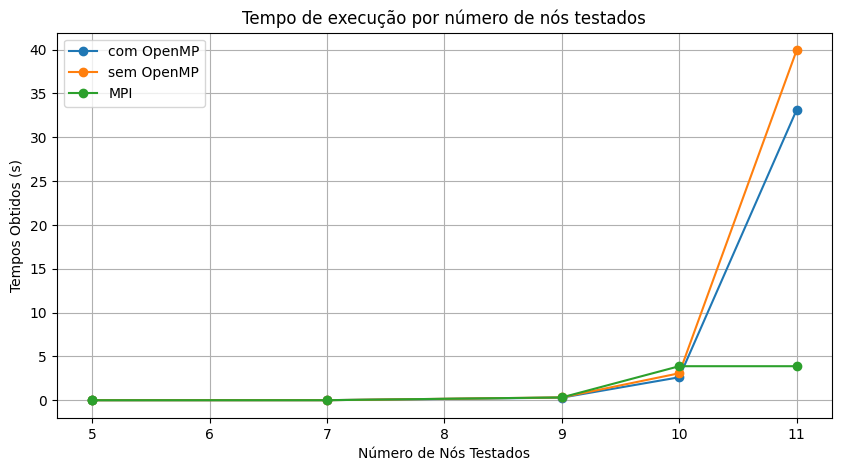

In [323]:
import matplotlib.pyplot as plt

# Dados
nos_testados = [5, 7, 9, 10, 11]
tempos_obtidos = [0.000457539, 0.00435195, 0.319498, 3.07664, 39.9375]

nos_testados3 = [5, 7, 9, 10, 11]
tempos_obtidos3 = [0.00256101, 0.00705917, 0.294842, 2.61972, 33.1415]

nos_testados4 = [5, 5, 7, 9, 10, 11]
tempos_obtidos4 = [0.00196103, 0.000338837, 0.0039757, 0.319603, 3.88174, 3.88174]

# Todos os dados MPI
plt.figure(figsize=(10, 5))
plt.plot(nos_testados4, tempos_obtidos4, marker='o')
plt.title('Tempo de execução por número de nós testados (MPI)')
plt.xlabel('Número de Nós Testados')
plt.ylabel('Tempos Obtidos (s)')
plt.grid(True)
plt.show()

# Comparação com e sem OpenMP
plt.figure(figsize=(10, 5))
plt.plot(nos_testados3, tempos_obtidos3, marker='o', label='com OpenMP')
plt.plot(nos_testados, tempos_obtidos, marker='o', label='sem OpenMP')
plt.plot(nos_testados4, tempos_obtidos4, marker='o', label='MPI')
plt.title('Tempo de execução por número de nós testados')
plt.xlabel('Número de Nós Testados')
plt.ylabel('Tempos Obtidos (s)')
plt.legend()
plt.grid(True)
plt.show()


**_NOTA_**: Compare todas as suas soluções em termos de tempo de execução. Para a mesma entrada, execute-a com cada uma das 4 implementações e compare os tempos de execução.

## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 1 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 4 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita o máximo de implementações a ser feita. Caso você opte por fazer algo além das 4 solicitadas, daremos até 1 ponto extra na nota do trabalho pelo esforço;


